In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.outliers_influence as sso
pd.options.display.max_rows = 999

In [2]:
df = pd.read_csv("./data/tracks_no_may.csv")

In [3]:
display(df.head())
df.shape

,Unnamed: 0,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,...,duration_ms,key,loadness,mode,tempo,valence,available_market,release_date,explicit,idx
0,0,5OpjJ9qy54D3PzQJ1s4Q9X,TESTIFY,acoustic,https://open.spotify.com/track/5OpjJ9qy54D3PzQ...,59.0,0.471,0.495,0.710,0.000000,...,243800.0,0.0,-3.941,1.0,90.024,0.319,79.0,2016-07-15,0.0,0
1,1,6ZgaHk6yrHBbHrbTmKl2pZ,Learned A Lot,acoustic,https://open.spotify.com/track/6ZgaHk6yrHBbHrb...,39.0,0.850,0.556,0.285,0.068000,...,270786.0,0.0,-9.884,1.0,128.167,0.322,78.0,2011,0.0,1
2,2,4wQKyYfNDY7E8ybcp0hF61,Jupiter's Call,acoustic,https://open.spotify.com/track/4wQKyYfNDY7E8yb...,35.0,0.879,0.694,0.354,0.000083,...,180952.0,2.0,-12.275,1.0,130.346,0.652,79.0,2018-06-01,0.0,2
3,3,3JndPOkXLuhupgWnRrPSua,Rain,acoustic,https://open.spotify.com/track/3JndPOkXLuhupgW...,36.0,0.654,0.497,0.372,0.000000,...,248293.0,5.0,-8.094,1.0,94.604,0.290,56.0,2002-04-09,0.0,3
4,4,3tjQYh1H3c17IQMdd8AIBb,The Shining Barrier,acoustic,https://open.spotify.com/track/3tjQYh1H3c17IQM...,40.0,0.794,0.373,0.160,0.764000,...,251075.0,10.0,-21.342,1.0,112.578,0.144,79.0,2014-09-15,0.0,4


(10292, 22)

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
display(df.head())
df.shape

,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,liveness,...,duration_ms,key,loadness,mode,tempo,valence,available_market,release_date,explicit,idx
0,5OpjJ9qy54D3PzQJ1s4Q9X,TESTIFY,acoustic,https://open.spotify.com/track/5OpjJ9qy54D3PzQ...,59.0,0.471,0.495,0.710,0.000000,0.0703,...,243800.0,0.0,-3.941,1.0,90.024,0.319,79.0,2016-07-15,0.0,0
1,6ZgaHk6yrHBbHrbTmKl2pZ,Learned A Lot,acoustic,https://open.spotify.com/track/6ZgaHk6yrHBbHrb...,39.0,0.850,0.556,0.285,0.068000,0.1090,...,270786.0,0.0,-9.884,1.0,128.167,0.322,78.0,2011,0.0,1
2,4wQKyYfNDY7E8ybcp0hF61,Jupiter's Call,acoustic,https://open.spotify.com/track/4wQKyYfNDY7E8yb...,35.0,0.879,0.694,0.354,0.000083,0.3810,...,180952.0,2.0,-12.275,1.0,130.346,0.652,79.0,2018-06-01,0.0,2
3,3JndPOkXLuhupgWnRrPSua,Rain,acoustic,https://open.spotify.com/track/3JndPOkXLuhupgW...,36.0,0.654,0.497,0.372,0.000000,0.0624,...,248293.0,5.0,-8.094,1.0,94.604,0.290,56.0,2002-04-09,0.0,3
4,3tjQYh1H3c17IQMdd8AIBb,The Shining Barrier,acoustic,https://open.spotify.com/track/3tjQYh1H3c17IQM...,40.0,0.794,0.373,0.160,0.764000,0.1070,...,251075.0,10.0,-21.342,1.0,112.578,0.144,79.0,2014-09-15,0.0,4


(10292, 21)

In [ ]:
df.describe()

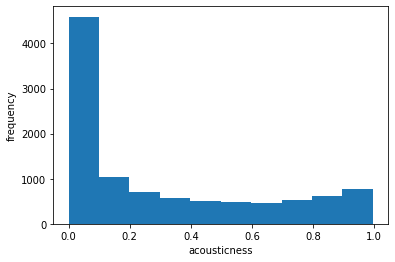

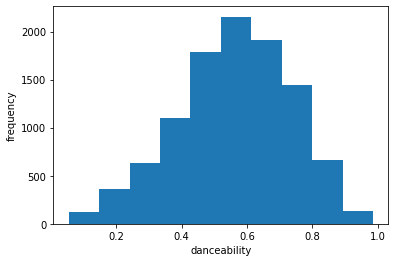

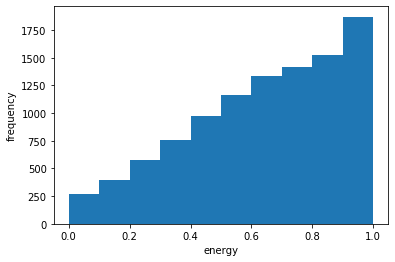

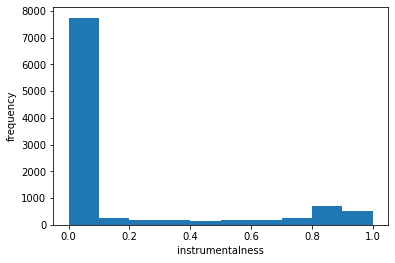

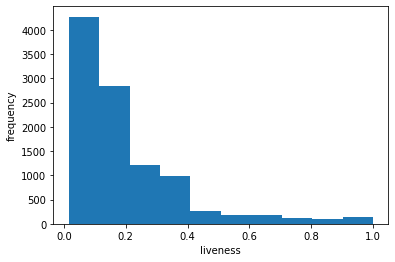

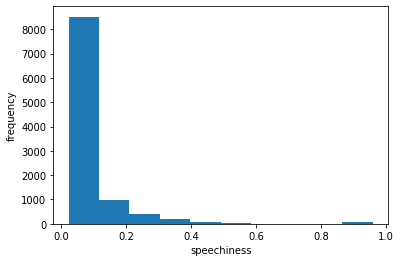

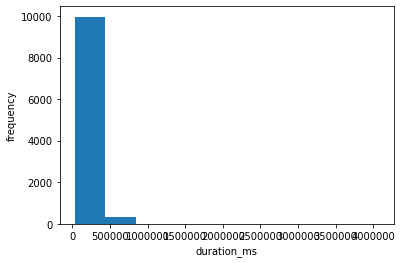

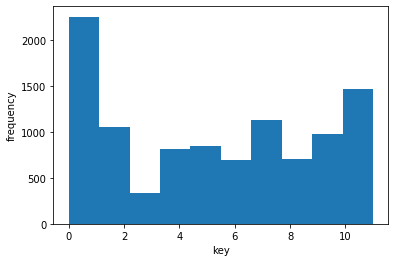

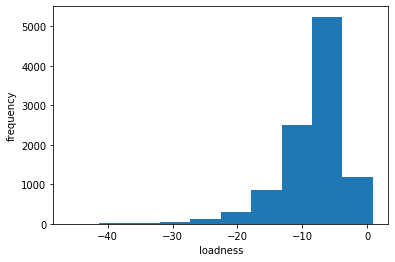

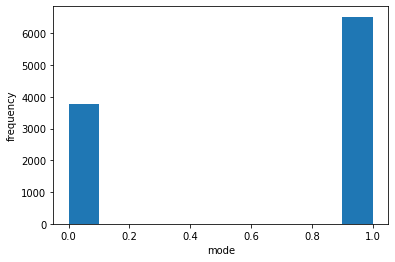

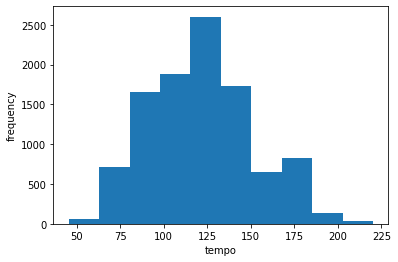

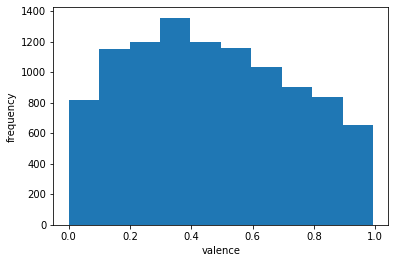

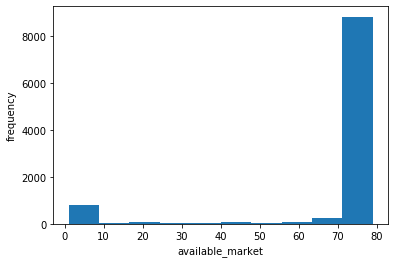

In [6]:
for i in range(5,18):
    histogram = plt.hist(df.iloc[:,i])
    plt.ylabel("frequency")
    columns_name = df.columns.values.tolist()[i]
    plt.xlabel(columns_name)
    plt.show()

In [61]:
genre_catogory = pd.DataFrame(df['genre'].value_counts().sort_index())
display(genre_catogory)
print(genre_catogory.index)
print(genre_catogory.shape)

,genre
acoustic,98
afrobeat,97
alt-rock,93
alternative,88
ambient,96
anime,100
black-metal,91
bluegrass,94
blues,91
brazil,72


Index(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime',
       'black-metal', 'bluegrass', 'blues', 'brazil',
       ...
       'soul', 'spanish', 'swedish', 'synth-pop', 'tango', 'techno', 'trance',
       'trip-hop', 'turkish', 'world-music'],
      dtype='object', length=112)
(112, 1)


In [8]:
popularity_catogory = pd.DataFrame(df['popularity'].value_counts())
popularity_catogory = popularity_catogory.sort_index() #根據index調整順序
display(popularity_catogory)

,popularity
0.0,205
1.0,28
2.0,19
3.0,13
4.0,17
5.0,22
6.0,28
7.0,26
8.0,49
9.0,43


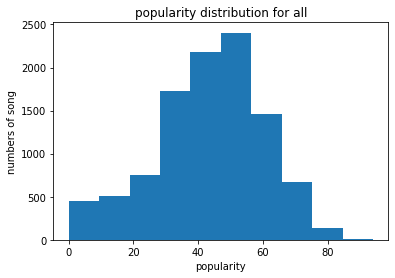

In [9]:
plt.hist(df['popularity'],bins = 10) 
plt.xlabel("popularity")
plt.ylabel("numbers of song")
title = "popularity distribution for all"
plt.title(title)
plt.show()

## 看誰的popularity有0分

In [10]:
pop_is_0 = df['popularity'] == 0 
df_pop_0 = df[pop_is_0]
genre_catogory_0 = pd.DataFrame(df_pop_0['genre'].value_counts().sort_index())
display(genre_catogory_0)
genre_catogory_0.shape

,genre
detroit-techno,35
heavy-metal,1
iranian,55
kids,48
romance,66


(5, 1)

## 小分類的popularity

In [62]:
cato = [ 'j-pop', 'k-pop', 'rock', 'metal', 'hip-hop', 'opera', 'country', 'dance', 'jazz', 'pop', 'blues',  'j-idol', 'disney']

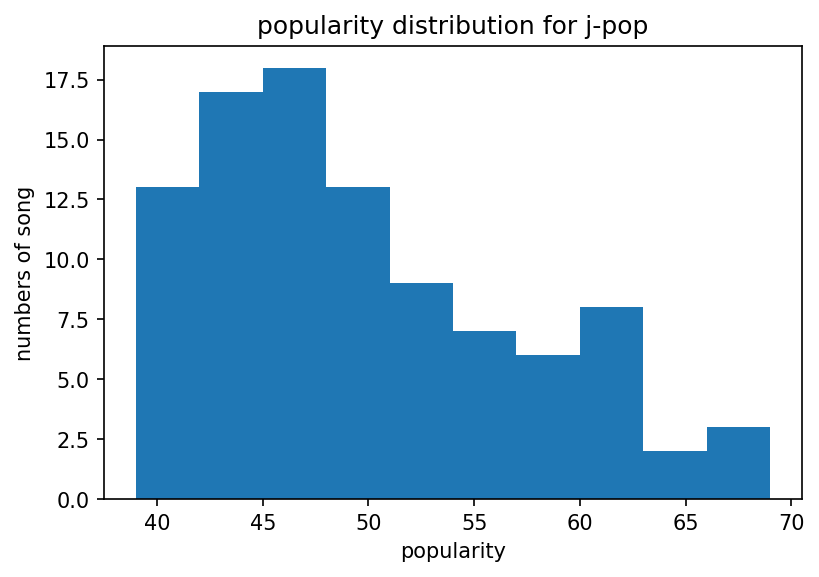

mean of popularity  49.291666666666664
min of popularity  39.0
max of popularity  69.0
standard deviation of popularity  7.346917243474037
skewness of popularity  0.6929780661163695
kurtosis of popularity  -0.4024851529691178


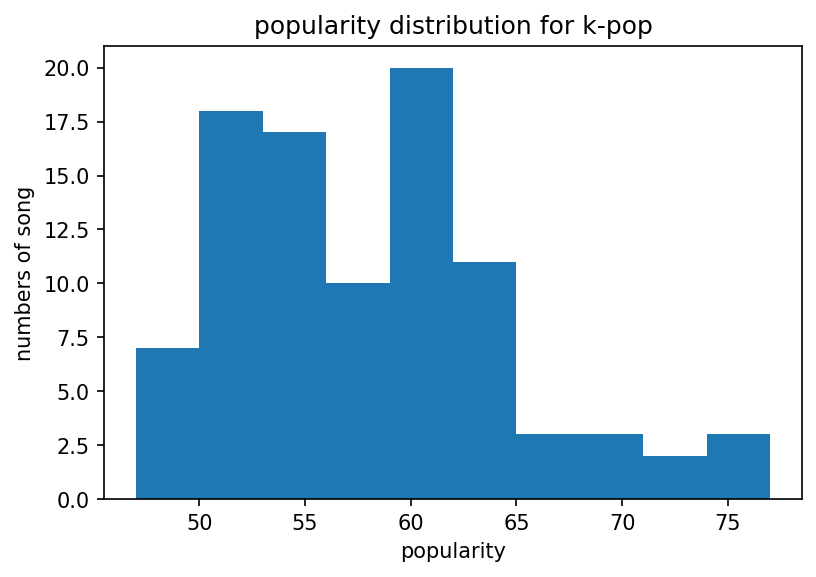

mean of popularity  57.54255319148936
min of popularity  47.0
max of popularity  77.0
standard deviation of popularity  6.559348403281751
skewness of popularity  0.7978654828632658
kurtosis of popularity  0.423048458697024


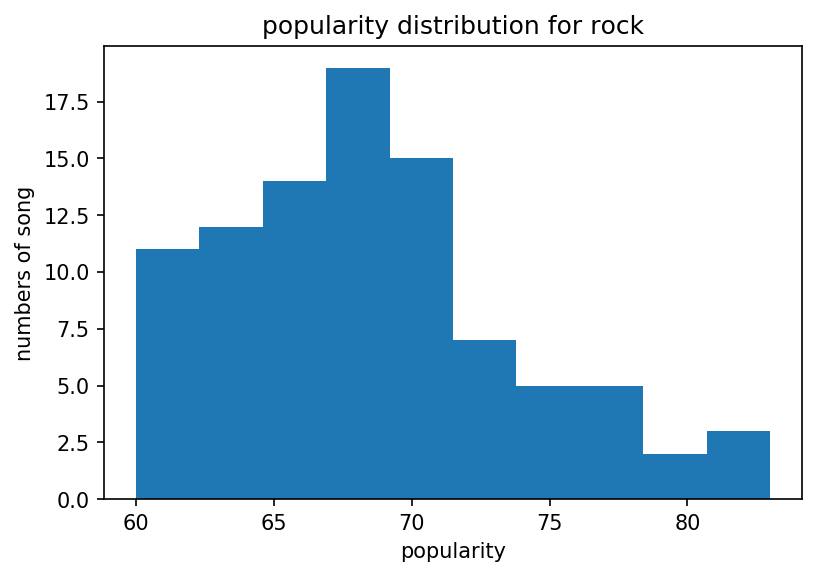

mean of popularity  68.47311827956989
min of popularity  60.0
max of popularity  83.0
standard deviation of popularity  5.339743109456512
skewness of popularity  0.756332009344692
kurtosis of popularity  0.1210006505595227


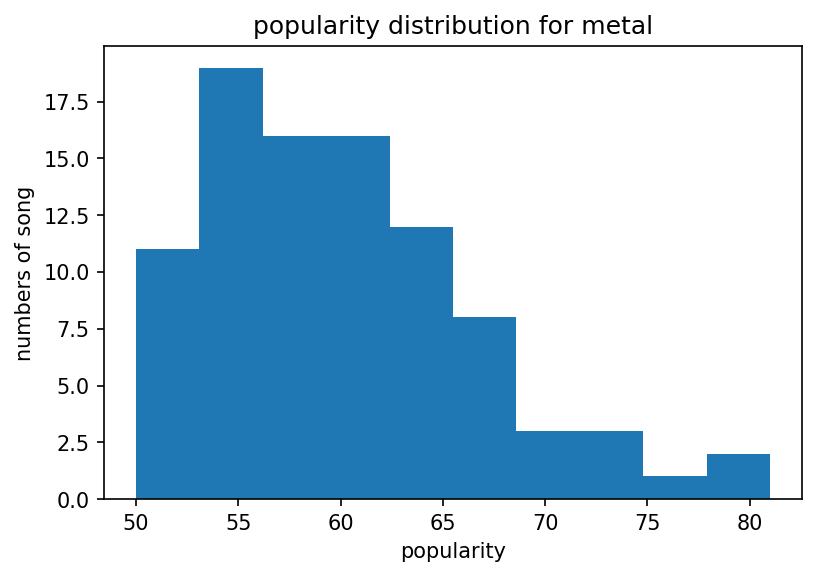

mean of popularity  60.07692307692308
min of popularity  50.0
max of popularity  81.0
standard deviation of popularity  6.384409429280343
skewness of popularity  0.8519002270976225
kurtosis of popularity  0.6004357095681678


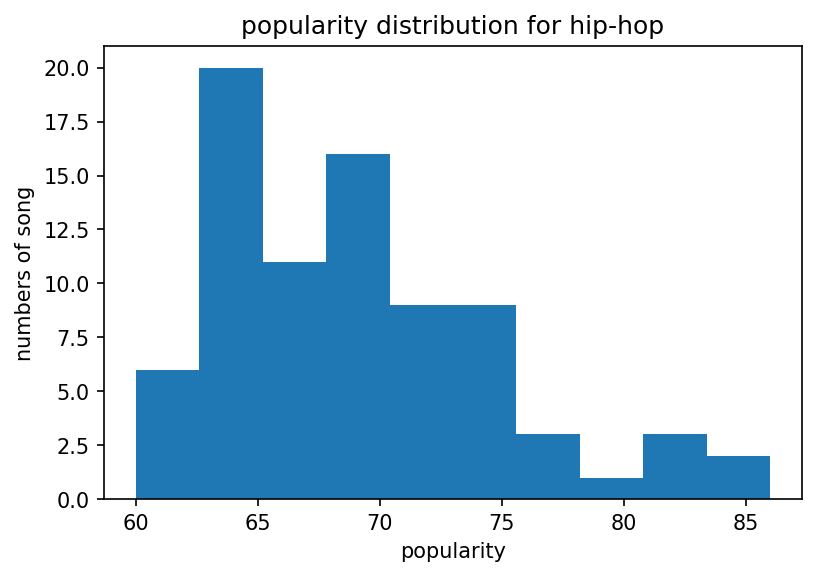

mean of popularity  68.9125
min of popularity  60.0
max of popularity  86.0
standard deviation of popularity  5.774658190333854
skewness of popularity  0.8799568929287541
kurtosis of popularity  0.45772898318637845


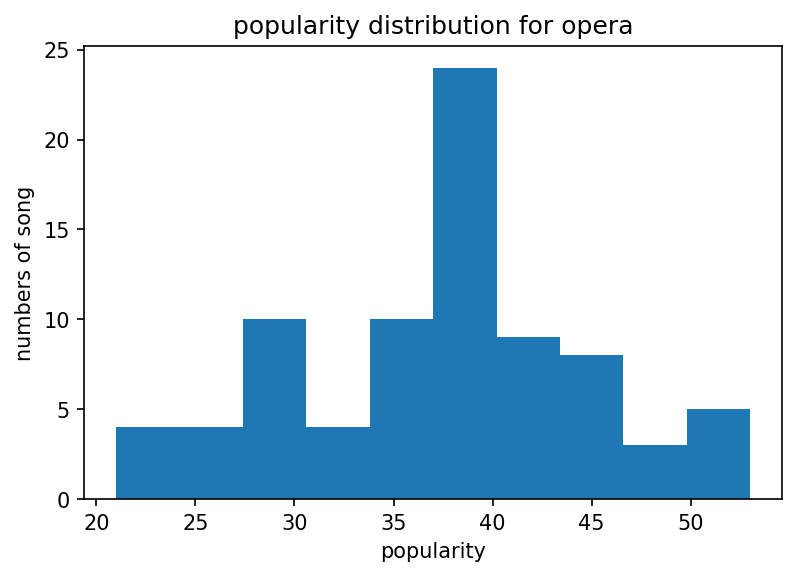

mean of popularity  37.25925925925926
min of popularity  21.0
max of popularity  53.0
standard deviation of popularity  7.461195912482425
skewness of popularity  -0.09303452227746001
kurtosis of popularity  -0.33878830792962455


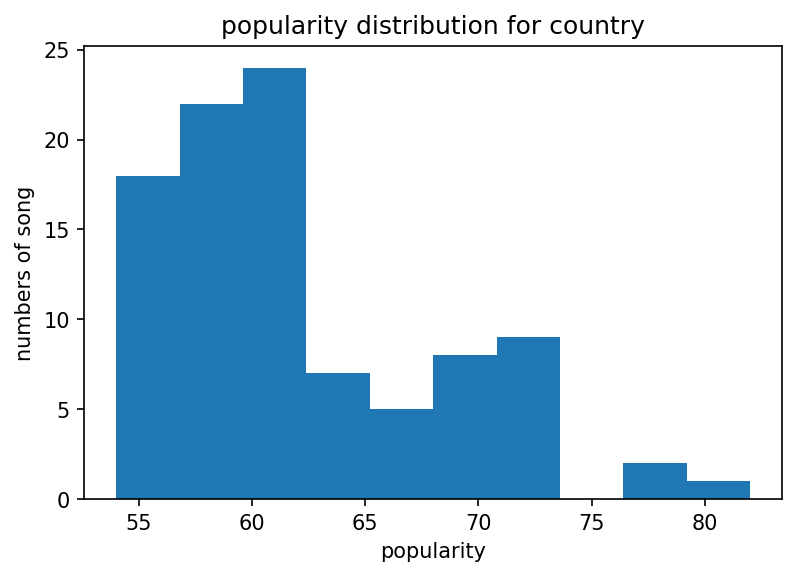

mean of popularity  61.989583333333336
min of popularity  54.0
max of popularity  82.0
standard deviation of popularity  6.072361530854658
skewness of popularity  0.9170206175208505
kurtosis of popularity  0.34562439793597965


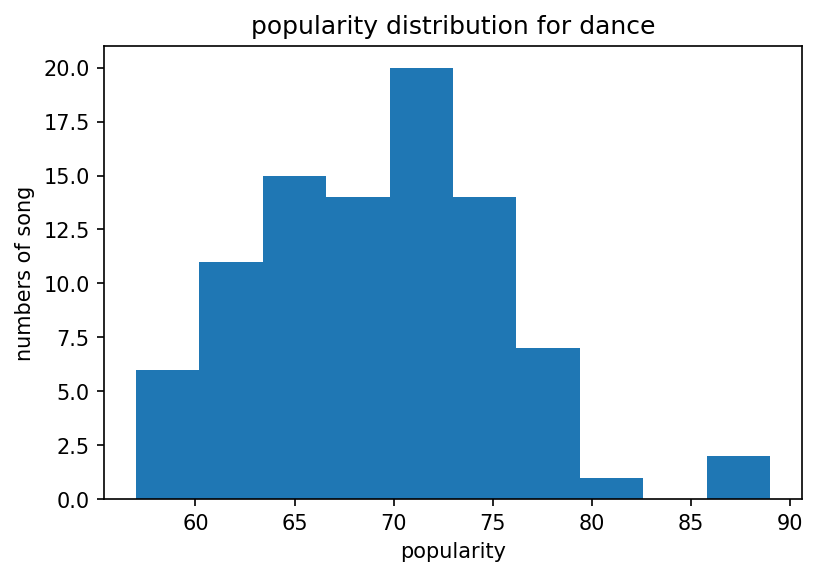

mean of popularity  69.23333333333333
min of popularity  57.0
max of popularity  89.0
standard deviation of popularity  6.14625125538991
skewness of popularity  0.5013524717490567
kurtosis of popularity  0.6098109940109495


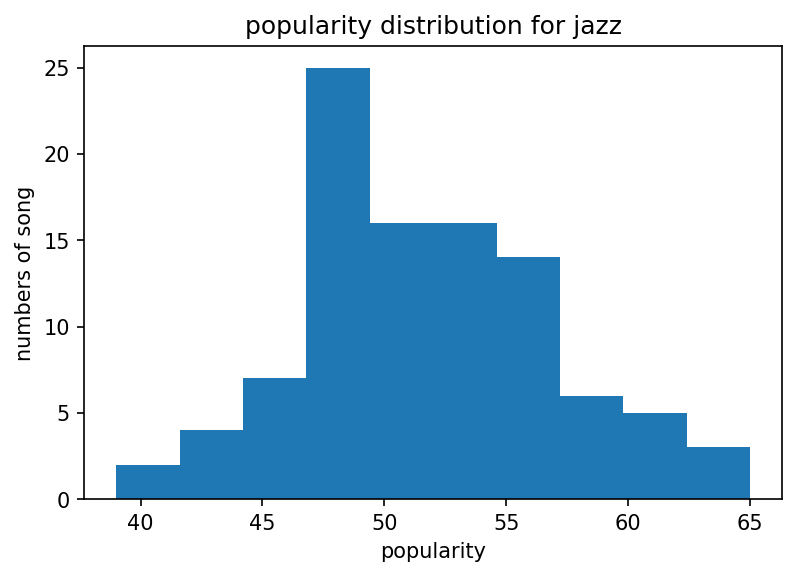

mean of popularity  51.45918367346939
min of popularity  39.0
max of popularity  65.0
standard deviation of popularity  5.133613440414755
skewness of popularity  0.25965050179938787
kurtosis of popularity  0.0816017783148899


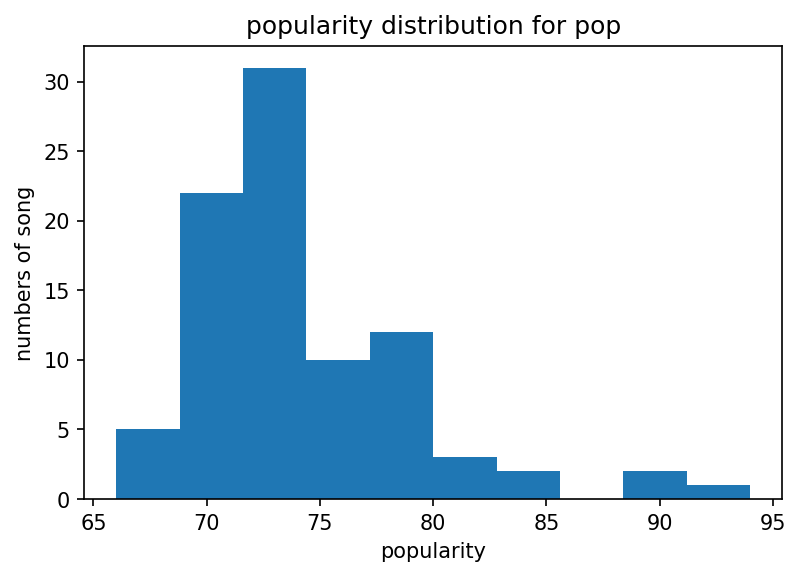

mean of popularity  74.19318181818181
min of popularity  66.0
max of popularity  94.0
standard deviation of popularity  5.014594686972034
skewness of popularity  1.3484128528030743
kurtosis of popularity  2.8739840419693037


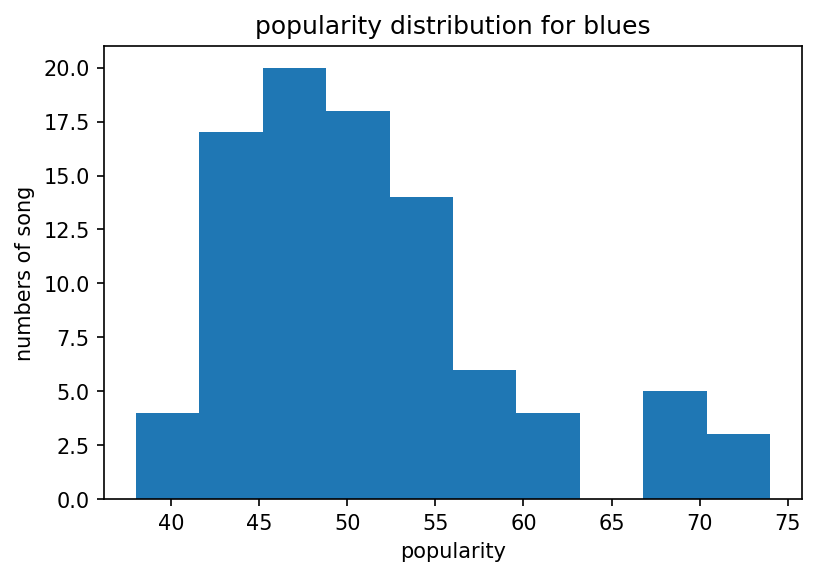

mean of popularity  51.34065934065934
min of popularity  38.0
max of popularity  74.0
standard deviation of popularity  7.820514021497537
skewness of popularity  1.0877268284029413
kurtosis of popularity  0.9821078346370067


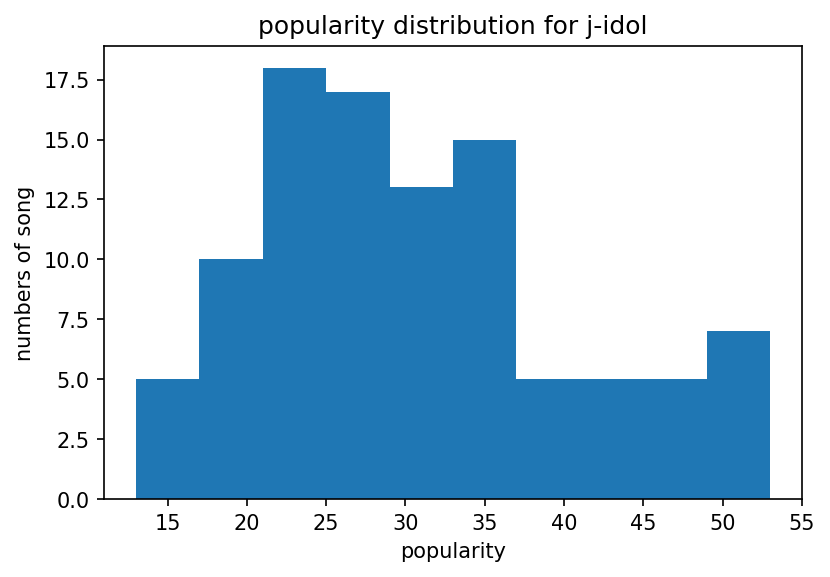

mean of popularity  30.47
min of popularity  13.0
max of popularity  53.0
standard deviation of popularity  9.82622239035157
skewness of popularity  0.5664259121595978
kurtosis of popularity  -0.42453877024001985


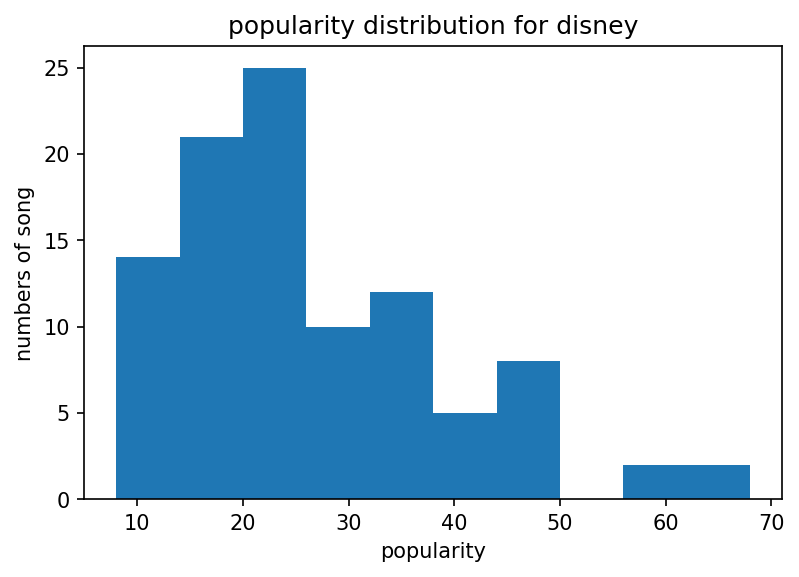

mean of popularity  26.07070707070707
min of popularity  8.0
max of popularity  68.0
standard deviation of popularity  12.784120032491622
skewness of popularity  1.048023482053721
kurtosis of popularity  0.7835789220041547


In [67]:
mean_group = []
max_group = []
min_group = []
data_collect = pd.DataFrame(columns=df.columns) 

for i in range(0,len(cato)):
    data_cato = df[df['genre'] == cato[i]]
    #display(data_cato.head())
        
    #作圖，繪出popularity散佈圖
    plt.hist(data_cato['popularity'],bins = 10) 
    plt.xlabel("popularity")
    plt.ylabel("numbers of song")
    title = "popularity distribution for "+cato[i]
    plt.title(title)
    plt.show()
    
    mean = data_cato['popularity'].mean()
    minimum = min(data_cato['popularity'])
    maximum = max(data_cato['popularity'])
    kurtosis = stats.kurtosis(data_cato['popularity'].values)
    skewness = stats.skew(data_cato['popularity'].values)
    std = data_cato['popularity'].std()
    

    print("mean of popularity ",mean)
    print("min of popularity ",minimum)
    print("max of popularity ",maximum)
    print("standard deviation of popularity ",std)
    print("skewness of popularity ",skewness)
    print("kurtosis of popularity ",kurtosis)
    
    mean_group.append(mean)
    max_group.append(maximum)
    min_group.append(minimum)
    
    data_collect = pd.concat([data_collect,data_cato])

In [79]:
data_collect[['popularity','genre']].groupby('genre').describe()

popularity                                                      
             count       mean        std   min    25%   50%    75%   max
genre                                                                   
blues         91.0  51.340659   7.820514  38.0  46.00  50.0  55.00  74.0
country       96.0  61.989583   6.072362  54.0  58.00  61.0  66.00  82.0
dance         90.0  69.233333   6.146251  57.0  65.00  69.0  73.00  89.0
disney        99.0  26.070707  12.784120   8.0  16.50  23.0  33.50  68.0
hip-hop       80.0  68.912500   5.774658  60.0  64.75  68.0  72.00  86.0
j-idol       100.0  30.470000   9.826222  13.0  23.75  28.5  35.25  53.0
j-pop         96.0  49.291667   7.346917  39.0  44.00  47.5  55.00  69.0
jazz          98.0  51.459184   5.133613  39.0  48.00  51.0  55.00  65.0
k-pop         94.0  57.542553   6.559348  47.0  52.00  57.0  61.00  77.0
metal         91.0  60.076923   6.384409  50.0  55.00  59.0  63.50  81.0
opera         81.0  37.259259   7.461196  21.0  33.00  38.0  41.00  53.0
pop           88.0  74.193182   5.014595  66.0  71.00  73.0  77.00  94.0
rock          93.0  68.473118   5.339743  60.0  65.00  67.0  71.00  83.0

## 檢查Outliers

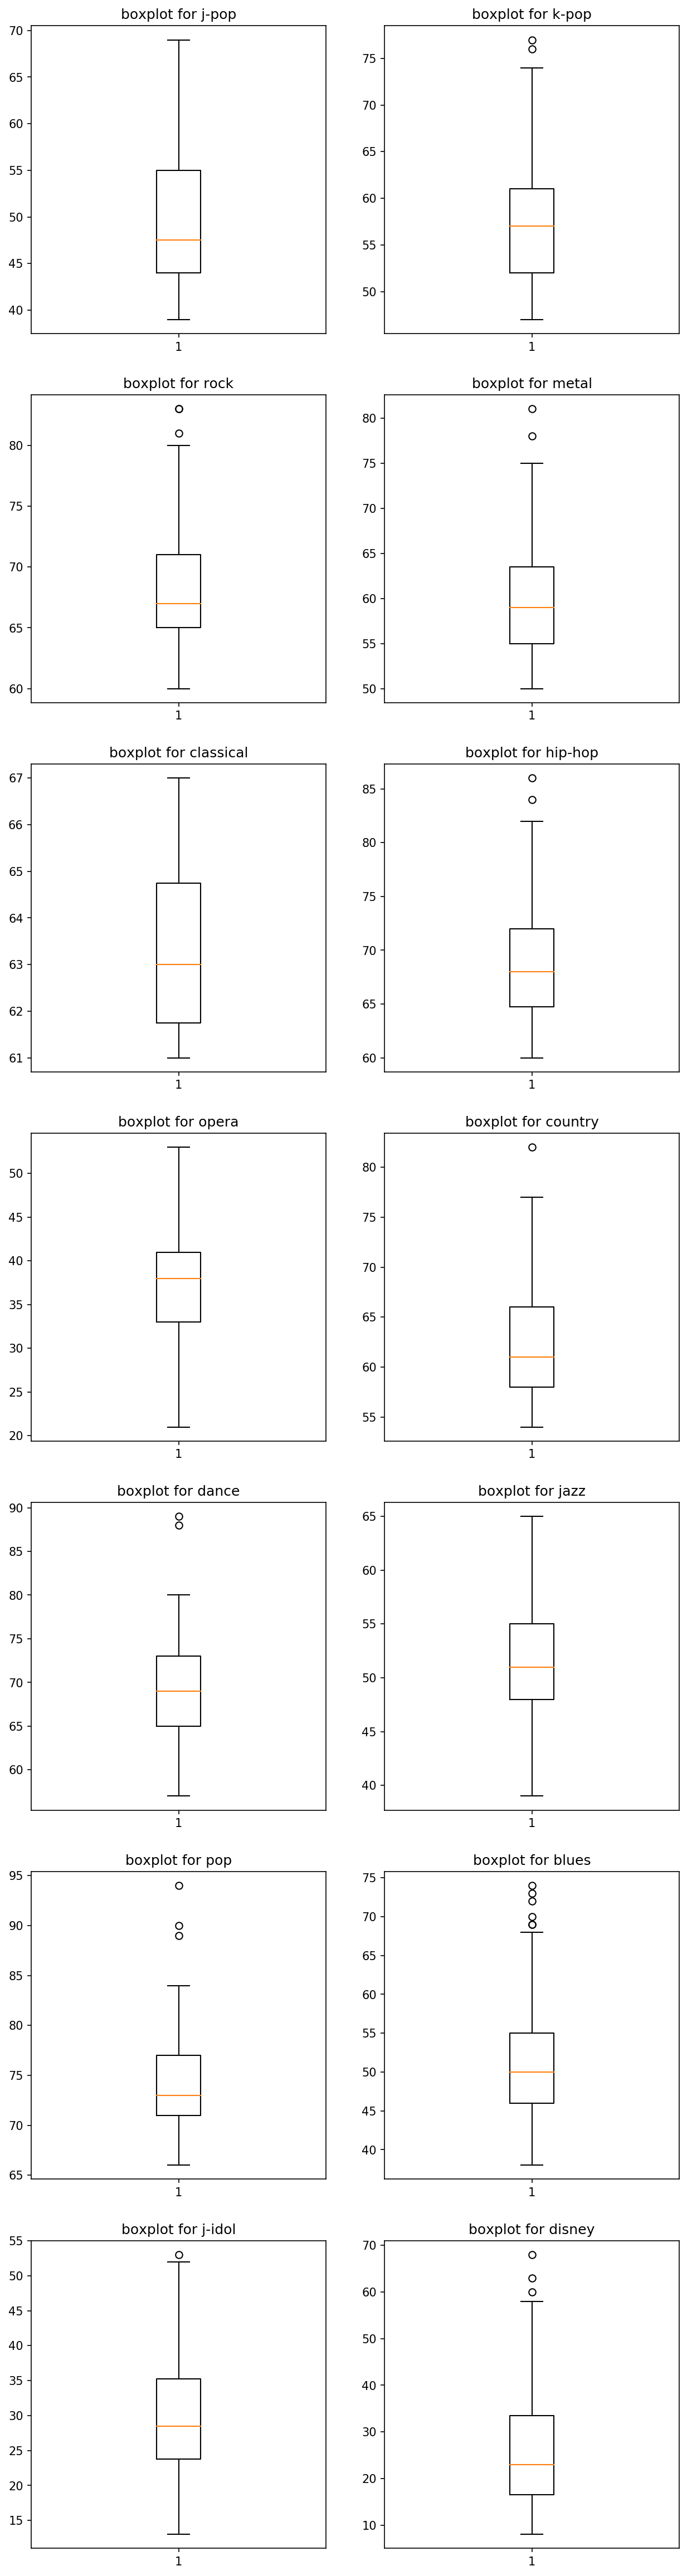

In [38]:
fig, axs = plt.subplots(int(len(cato)/2), 2, figsize=(10,40))

for i in range(0,len(cato)):
    data_cato = df[df['genre'] == cato[i]]
    #display(data_cato.head())
    
    #作圖，繪出popularity盒狀圖
    #data_cato['popularity'].plot(kind="box")
    axs[int(i/2), i%2].boxplot(data_cato['popularity'])
    title = "boxplot for "+cato[i]
    axs[int(i/2), i%2].set_title(title)

plt.show()

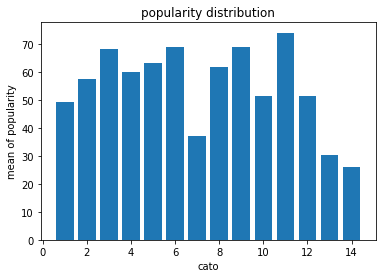

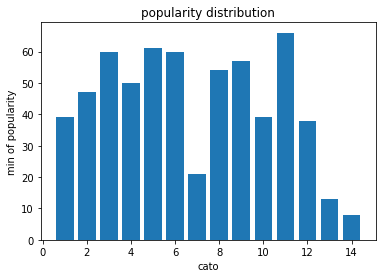

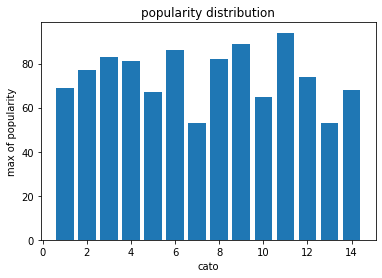

In [24]:
x = np.linspace(1,14,14)
y = mean_group
plt.bar(x,y)
plt.xlabel("cato")
plt.ylabel("mean of popularity")
plt.title("popularity distribution")
plt.show()

x = np.linspace(1,14,14)
y = min_group
plt.bar(x,y)
plt.xlabel("cato")
plt.ylabel("min of popularity")
plt.title("popularity distribution")
plt.show()

x = np.linspace(1,14,14)
y = max_group
plt.bar(x,y)
plt.xlabel("group")
plt.ylabel("max of popularity")
plt.title("popularity distribution")
plt.show()

## 曲風分類的popularity

,genre
black-metal,91
death-metal,96
emo,89
grindcore,99
hardcore,100
heavy-metal,100
metal,91
metalcore,100


Index(['black-metal', 'death-metal', 'emo', 'grindcore', 'hardcore',
       'heavy-metal', 'metal', 'metalcore'],
      dtype='object')
(8, 1)
mean of popularity  39.08093994778068
min of popularity  0.0
max of popularity  83.0


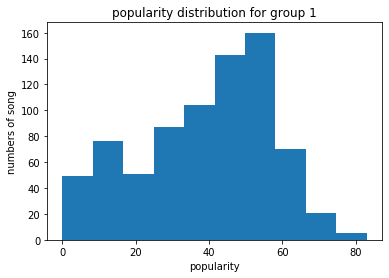

,genre
alt-rock,93
goth,95
grunge,89
hard-rock,95
j-rock,97
psych-rock,94
punk,96
punk-rock,96
rock,93
rock-n-roll,96


Index(['alt-rock', 'goth', 'grunge', 'hard-rock', 'j-rock', 'psych-rock',
       'punk', 'punk-rock', 'rock', 'rock-n-roll', 'rockabilly'],
      dtype='object')
(11, 1)
mean of popularity  51.13365384615385
min of popularity  22.0
max of popularity  83.0


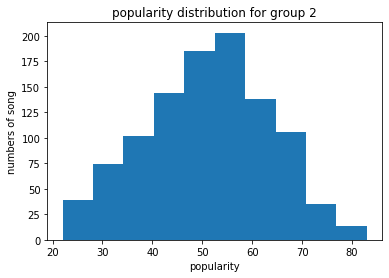

,genre
cantopop,100
indie-pop,93
j-pop,96
mandopop,98
pop,88
pop-film,89
power-pop,97
synth-pop,96


Index(['cantopop', 'indie-pop', 'j-pop', 'mandopop', 'pop', 'pop-film',
       'power-pop', 'synth-pop'],
      dtype='object')
(8, 1)
mean of popularity  48.09114927344782
min of popularity  17.0
max of popularity  94.0


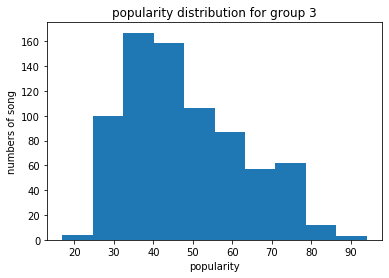

,genre
afrobeat,97
blues,91
chill,95
funk,86
groove,93
jazz,98
r-n-b,91


Index(['afrobeat', 'blues', 'chill', 'funk', 'groove', 'jazz', 'r-n-b'], dtype='object')
(7, 1)
mean of popularity  49.77112135176651
min of popularity  16.0
max of popularity  80.0


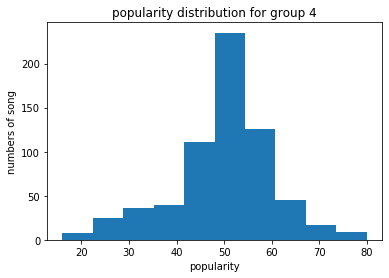

,genre
acoustic,98
drum-and-bass,97
guitar,98
piano,97


Index(['acoustic', 'drum-and-bass', 'guitar', 'piano'], dtype='object')
(4, 1)
mean of popularity  39.66410256410256
min of popularity  14.0
max of popularity  69.0


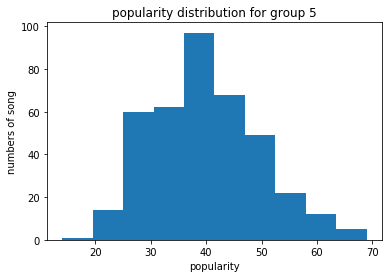

,genre
ambient,96
breakbeat,100
chicago-house,95
club,100
deep-house,88
detroit-techno,97
dub,95
dubstep,97
edm,85
electro,88


Index(['ambient', 'breakbeat', 'chicago-house', 'club', 'deep-house',
       'detroit-techno', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'hardstyle', 'house', 'idm', 'industrial', 'minimal-techno',
       'progressive-house', 'techno', 'trance', 'trip-hop'],
      dtype='object')
(20, 1)
mean of popularity  39.306188925081436
min of popularity  0.0
max of popularity  84.0


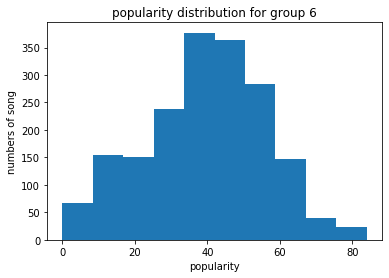

,genre
children,93
kids,98


Index(['children', 'kids'], dtype='object')
(2, 1)
mean of popularity  20.287958115183248
min of popularity  0.0
max of popularity  56.0


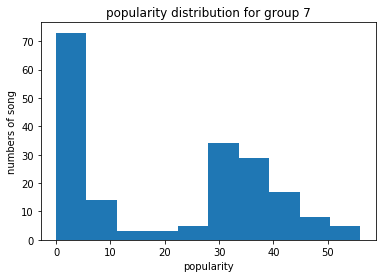

,genre
dance,90
dancehall,98
disco,95
garage,97
j-dance,96
tango,97


Index(['dance', 'dancehall', 'disco', 'garage', 'j-dance', 'tango'], dtype='object')
(6, 1)
mean of popularity  43.640488656195465
min of popularity  4.0
max of popularity  89.0


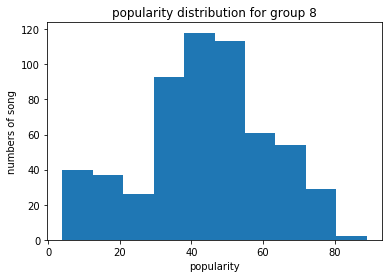

,genre
reggae,93
reggaeton,89
ska,97


Index(['reggae', 'reggaeton', 'ska'], dtype='object')
(3, 1)
mean of popularity  55.132616487455195
min of popularity  32.0
max of popularity  89.0


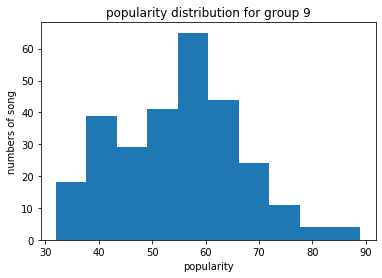

,genre
bluegrass,94
country,96
folk,97
honky-tonk,100
sertanejo,85


Index(['bluegrass', 'country', 'folk', 'honky-tonk', 'sertanejo'], dtype='object')
(5, 1)
mean of popularity  45.25635593220339
min of popularity  7.0
max of popularity  82.0


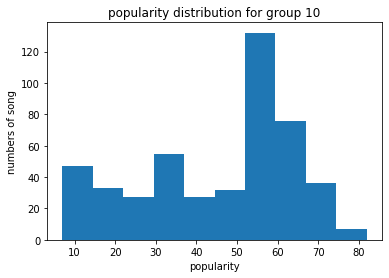

,genre
comedy,97
happy,99


Index(['comedy', 'happy'], dtype='object')
(2, 1)
mean of popularity  30.591836734693878
min of popularity  9.0
max of popularity  59.0


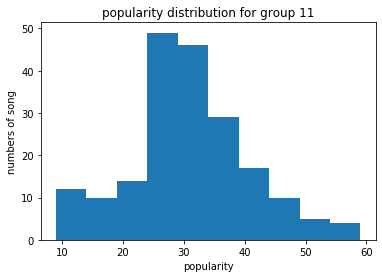

,genre
brazil,72
forro,84
latin,94
latino,93
mpb,88
pagode,77
salsa,96
samba,91


Index(['brazil', 'forro', 'latin', 'latino', 'mpb', 'pagode', 'salsa',
       'samba'],
      dtype='object')
(8, 1)
mean of popularity  46.65755395683453
min of popularity  9.0
max of popularity  87.0


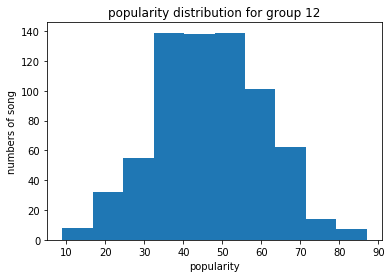

,genre
alternative,88
hip-hop,80


Index(['alternative', 'hip-hop'], dtype='object')
(2, 1)
mean of popularity  66.14285714285714
min of popularity  56.0
max of popularity  86.0


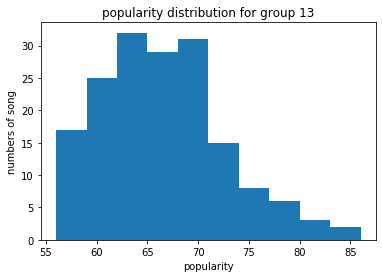

,genre
british,92
french,79
german,5
indian,94
iranian,98
malay,98
spanish,91
swedish,97
turkish,98
world-music,98


Index(['british', 'french', 'german', 'indian', 'iranian', 'malay', 'spanish',
       'swedish', 'turkish', 'world-music'],
      dtype='object')
(10, 1)
mean of popularity  39.43764705882353
min of popularity  0.0
max of popularity  76.0


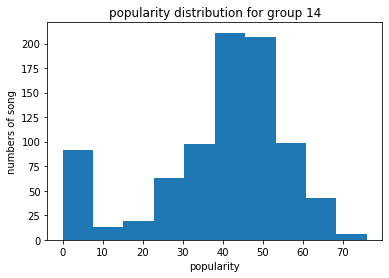

,genre
opera,81
show-tunes,100


Index(['opera', 'show-tunes'], dtype='object')
(2, 1)
mean of popularity  38.668508287292816
min of popularity  21.0
max of popularity  72.0


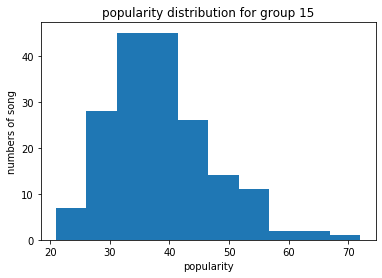

In [15]:
#抓取特定曲風並彙整成一組
group_1 = ['death-metal', 'black-metal', 'heavy-metal', 'metal', 'metalcore', 'grindcore', 'hardcore', 'emo']
group_2 = ['hard-rock', 'alt-rock',  'j-rock', 'rock', 'rock-n-roll', 'rockabilly', 'psych-rock', 'punk', 'punk-rock', 'grunge', 'goth']
group_3 = ['cantopop', 'j-pop',  'j-idol' 'k-pop', 'pop', 'pop-film', 'power-pop', 'mandopop', 'synth-pop', 'indie-pop']
group_4 = ['afrobeat', 'blues', 'chill', 'funk', 'r-n-b', 'groove', 'jazz']
group_5 = ['acoustic', 'piano', 'drum-and-bass', 'guitar']
group_6 = ['chicago-house', 'house', 'progressive-house', 'deep-house', 'ambient', 'electronic', 'breakbeat', 'industrial', 'techno', 'hardstyle',  'club', 'dub', 'dubstep', 'idm', 'detroit-techno', 'electro', 'edm', 'minimal-techno', 'trance', 'trip-hop']
group_7 = ['children', 'kids']
group_8 = ['dance', 'dancehall', 'j-dance', 'tango', 'disco', 'garage']
group_9 = ['reggae', 'reggaeton', 'ska']
group_10 = ['bluegrass', 'country', 'honky-tonk', 'sertanejo', 'folk']
group_11 = ['comedy', 'happy']
group_12 = ['latin', 'brazil', 'salsa', 'latino', 'samba', 'mpb', 'forro', 'pagode']
group_13 = ['hip-hop', 'alternative']
group_14 = ['british', 'french', 'german', 'indian','spanish', 'swedish', 'turkish', 'world-music','iranian','malay']
group_15 = ['opera', 'show-tunes']

group = [group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,group_10,group_11,group_12,group_13,group_14,group_15]

data_group = []
genre_group = []
popularity_group = []
mean_group = []
max_group = []
min_group = []

for i in range(0,15):
    data = df.iloc[[g in group[i] for g in df["genre"]], :]

    #檢查曲風，並看看每種曲風歌曲數，存成genre_catogory_metal的dataframe
    genre_catogory = pd.DataFrame(data['genre'].value_counts().sort_index())
    display(genre_catogory)
    print(genre_catogory.index)
    print(genre_catogory.shape)

    #將data的popularity存成popularity_catogory_metal的dataframe
    popularity_catogory = pd.DataFrame(data['popularity'].value_counts())
    popularity_catogory = popularity_catogory.rename(columns={'popularity':'numbers'}) #避免誤會，將popularity改成numbers
    popularity_catogory = popularity_catogory.sort_index() #根據index調整順序
    
    #算popularity的平均
    mean = data['popularity'].mean()
    minimum = min(data['popularity'])
    maximum = max(data['popularity'])
    print("mean of popularity ",mean)
    print("min of popularity ",minimum)
    print("max of popularity ",maximum)
    
    #作圖，繪出popularity散佈圖
    plt.hist(data['popularity'],bins=10) 
    plt.xlabel("popularity")
    plt.ylabel("numbers of song")
    title = "popularity distribution for group "+str(i+1)
    plt.title(title)
    plt.show()
    
    #將資料存起來
    data_group.append(data)
    genre_group.append(genre_catogory)
    popularity_group.append(popularity_catogory)
    mean_group.append(mean)
    max_group.append(maximum)
    min_group.append(minimum)

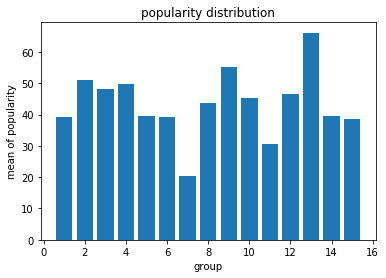

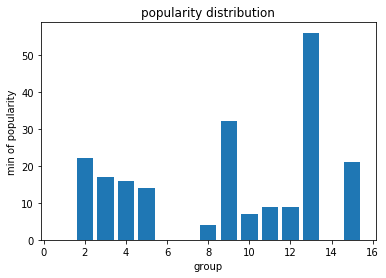

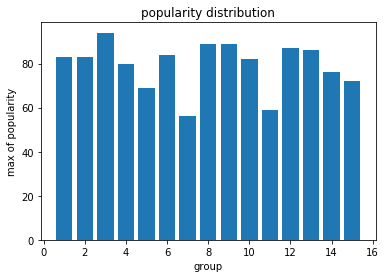

In [16]:
x = np.linspace(1,15,15)
y = mean_group
plt.bar(x,y)
plt.xlabel("group")
plt.ylabel("mean of popularity")
plt.title("popularity distribution")
plt.show()

x = np.linspace(1,15,15)
y = min_group
plt.bar(x,y)
plt.xlabel("group")
plt.ylabel("min of popularity")
plt.title("popularity distribution")
plt.show()

x = np.linspace(1,15,15)
y = max_group
plt.bar(x,y)
plt.xlabel("group")
plt.ylabel("max of popularity")
plt.title("popularity distribution")
plt.show()